In [0]:
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 13456, done.
remote: Total 13456 (delta 0), reused 0 (delta 0), pack-reused 13456
Receiving objects: 100% (13456/13456), 12.00 MiB | 22.09 MiB/s, done.
Resolving deltas: 100% (9201/9201), done.


In [0]:
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/darknet


In [0]:
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [0]:
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:910:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void cv_draw_object(image, float*, int, int, int*, float*, int*, int, char**)’:
./src/image_opencv.cpp:1391:14: warning: unused variable ‘buff’ [-Wunused-variable]
         char buff[100];
              ^~~~
./src/image_opencv.cpp:1367:9: warning: unused variable ‘it_tb_res’ [-W

In [0]:
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

In [0]:
%cd darknet

[Errno 20] Not a directory: 'darknet'
/content/darknet


In [0]:
!wget https://pjreddie.com/media/files/yolov3-tiny.weights

--2020-05-13 01:34:24--  https://pjreddie.com/media/files/yolov3-tiny.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35434956 (34M) [application/octet-stream]
Saving to: ‘yolov3-tiny.weights’

yolov3-tiny.weights 100%[===================>]  33.79M   290KB/s    in 1m 59s  

2020-05-13 01:36:24 (291 KB/s) - ‘yolov3-tiny.weights’ saved [35434956/35434956]



In [0]:
!./darknet partial cfg/yolov3-tiny.cfg yolov3-tiny.weights yolov3-tiny.conv.15 15

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 GPU isn't used 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     16       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  16 0.150 BF
   1 max                2x 2/ 2    416 x 416 x  16 ->  208 x 208 x  16 0.003 BF
   2 conv     32       3 x 3/ 1    208 x 208 x  16 ->  208 x 208 x  32 0.399 BF
   3 max                2x 2/ 2    208 x 208 x  32 ->  104 x 104 x  32 0.001 BF
   4 conv     64       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  64 0.399 BF
   5 max                2x 2/ 2    104 x 104 x  64 ->   52 x  52 x  64 0.001 BF
   6 conv    128       3 x 3/ 1     52 x  52 x  64 ->   52 x  52 x 128 0.399 BF
   7 max                2x 2/ 2     52 x  52 x 128 ->   26 x  26 x 128 0.000 BF
   8 conv    256       3 x 3/ 1     26 x  26 x 128 ->   26 x  26 x 256 0.399 BF
   9 max                2x 2/ 2  

In [0]:
!cp "/content/drive/My Drive/yolov3-tiny/obj.data" "/content/darknet/data"
!cp "/content/drive/My Drive/yolov3-tiny/obj.names" "/content/darknet/data"

In [0]:
!cp -r "/content/drive/My Drive/yolov3-tiny/obj" "/content/darknet/build/darknet/x64/data/"

In [0]:
!cp "/content/drive/My Drive/yolov3-tiny/train.txt" "/content/darknet/build/darknet/x64/data"


In [0]:
!./darknet detector calc_anchors data/obj.data -num_of_clusters 6 -width 416 -height 416

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0

 num_of_clusters = 6, width = 416, height = 416 
 read labels from 335 images 
 loaded 	 image: 335 	 box: 4745
 all loaded. 

 calculating k-means++ ...

 iterations = 37 


counters_per_class = 2270, 2359, 116

 avg IoU = 75.20 % 

Saving anchors to the file: anchors.txt 
anchors =   2,  5,   3,  8,   5, 13,   8, 21,  14, 35,  25, 59
^C


In [0]:
!./darknet detector train data/obj.data yolov3-tiny_obj.cfg backup/yolov3-tiny_obj_6000.weights -dont_show

Streaming output truncated to the last 5000 lines.
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 23 Avg (IOU: 0.288621, GIOU: 0.109654), Class: 0.948417, Obj: 0.733655, No Obj: 0.002218, .5R: 0.265625, .75R: 0.066406, count: 256, class_loss = 2.368244, iou_loss = 1.372849, total_loss = 3.741093 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 16 Avg (IOU: 0.623710, GIOU: 0.576107), Class: 0.992450, Obj: 0.836723, No Obj: 0.006674, .5R: 0.716129, .75R: 0.445161, count: 155, class_loss = 0.651343, iou_loss = 0.388760, total_loss = 1.040103 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 23 Avg (IOU: 0.374140, GIOU: 0.247627), Class: 0.965247, Obj: 0.692291, No Obj: 0.001965, .5R: 0.357143, .75R: 0.112245, count: 196, class_loss = 2.203826, iou_loss = 1.011858, total_loss = 3.215685 

 8335: 2.224312, 2.412424 avg loss, 0.000010 rate, 1.187100 seconds, 533440 images, 0.239001 hours left
Loaded: 0.000032 seconds
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Re

In [0]:
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov3-tiny_obj.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov3-tiny_obj.cfg
%cd ..

/content/darknet/cfg
/content/darknet


In [0]:
!cp data/obj.names /content/darknet/build/darknet/x64/data

In [0]:
!./darknet detector map data/obj.data yolov3-tiny_obj.cfg backup/yolov3-tiny_obj_6000.weights

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 2, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     16       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  16 0.150 BF
   1 max                2x 2/ 2    416 x 416 x  16 ->  208 x 208 x  16 0.003 BF
   2 conv     32       3 x 3/ 1    208 x 208 x  16 ->  208 x 208 x  32 0.399 BF
   3 max                2x 2/ 2    208 x 208 x  32 ->  104 x 104 x  32 0.001 BF
   4 conv     64       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  64 0.399 BF
   5 max                2x 2/ 2    104 x 104 x  64 ->   52 x  52 x  64 0.001 BF
   6 conv    128       3 x 3/ 1     52 x  52 x  64 ->   52 x  52 x 128 0.399 BF
   7 max                2x 2/ 2     52 x  52 x 128 ->   26 x  26 x 128 0.000 BF
   8 conv    256       3 x 3/ 1     26 x  26 x 128 ->   

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 2, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     16       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  16 0.150 BF
   1 max                2x 2/ 2    416 x 416 x  16 ->  208 x 208 x  16 0.003 BF
   2 conv     32       3 x 3/ 1    208 x 208 x  16 ->  208 x 208 x  32 0.399 BF
   3 max                2x 2/ 2    208 x 208 x  32 ->  104 x 104 x  32 0.001 BF
   4 conv     64       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  64 0.399 BF
   5 max                2x 2/ 2    104 x 104 x  64 ->   52 x  52 x  64 0.001 BF
   6 conv    128       3 x 3/ 1     52 x  52 x  64 ->   52 x  52 x 128 0.399 BF
   7 max                2x 2/ 2     52 x  52 x 128 ->   26 x  26 x 128 0.000 BF
   8 conv    256       3 x 3/ 1     26 x  26 x 128 ->   

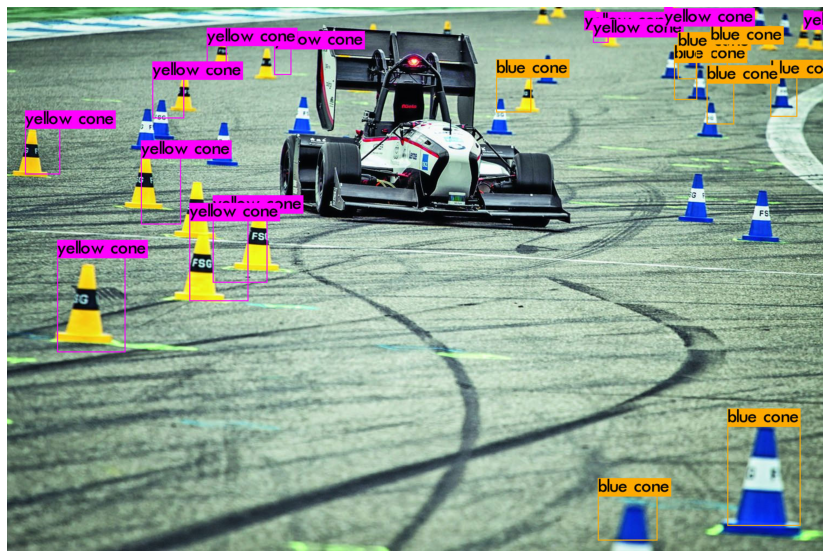

In [0]:
!./darknet detector test data/obj.data yolov3-tiny_obj.cfg backup/yolov3-tiny_obj_final.weights /content/drive/My\ Drive/jitesh/test_images_2.jpg -thresh 0.4 -dont_show
imShow('predictions.jpg')